### Project Objective- The purpose of this project is to predict whether customer is going to default or not based on historical data

#### DATASET SOURCE:https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above) PAY_2: Repayment status in August, 2005 (scale same as above) PAY_3: Repayment status in July, 2005 (scale same as above) PAY_4: Repayment status in June, 2005 (scale same as above) PAY_5: Repayment status in May, 2005 (scale same as above) PAY_6: Repayment status in April, 2005 (scale same as above) BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar) BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar) BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar) BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar) BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar) BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar) PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar) PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar) PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar) PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar) PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar) PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar) default.payment.next.month: Default payment (1=yes, 0=no)

##### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
import warnings
warnings.filterwarnings("ignore")

#### Reading dataset in csv format

In [3]:
data=pd.read_csv('UCI_Credit_Card.csv')

##### Exploratory Data Analysis

In [4]:
data.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2     3913.0     3102.0      689.0        0.0        0.0   
1      0      2     2682.0     1725.0     2682.0     3272.0     3455.0   
2      0      0    29239.0    14027.0    13559.0    14331.0    14948.0   
3      0      0    46990.0    48233.0    49291.0    28314.0    28959.0   
4      0      0     8617.0     5670.0    35835.0    20940.0    19146.0   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0        0.0       0.0     689.0       0.0       0.0       0.0       0.0   
1     3261.0       0.0    1000.0    1000.0    1000.0       0.0    2000.0   
2    15549.0    1518.0    1500.0    1000.0    1000.0    1000.0    5000.0   
3    29547.0    2000.0    2019.0    1200.0    1100.0    1069.0    1000.0   
4    19131.0    2000.0   36681.0   10000.0    9000.0     689.0     679.0   

   default.payment.next.month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0

In [4]:
# Renaming columns for easy interpretation
data=data.rename(columns={'default.payment.next.month': 'default', 'PAY_0':'PAY_1'})
# Droping the 'ID' column from dataset as it won't have any significance
data=data.drop(columns=['ID'],axis=1)

In [6]:
# data.info() function is used to get a concise summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_1      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

From above function, we can infer that the 'UCI_Credit_Card.csv' dataset contains 30000 observations (rows) and 24 features (columns). The dataset contains all the numerical features, so no need to do any encoding

In [9]:
# Identification of null values
data.isnull().mean()

LIMIT_BAL    0.0
SEX          0.0
EDUCATION    0.0
MARRIAGE     0.0
AGE          0.0
PAY_1        0.0
PAY_2        0.0
PAY_3        0.0
PAY_4        0.0
PAY_5        0.0
PAY_6        0.0
BILL_AMT1    0.0
BILL_AMT2    0.0
BILL_AMT3    0.0
BILL_AMT4    0.0
BILL_AMT5    0.0
BILL_AMT6    0.0
PAY_AMT1     0.0
PAY_AMT2     0.0
PAY_AMT3     0.0
PAY_AMT4     0.0
PAY_AMT5     0.0
PAY_AMT6     0.0
default      0.0
dtype: float64

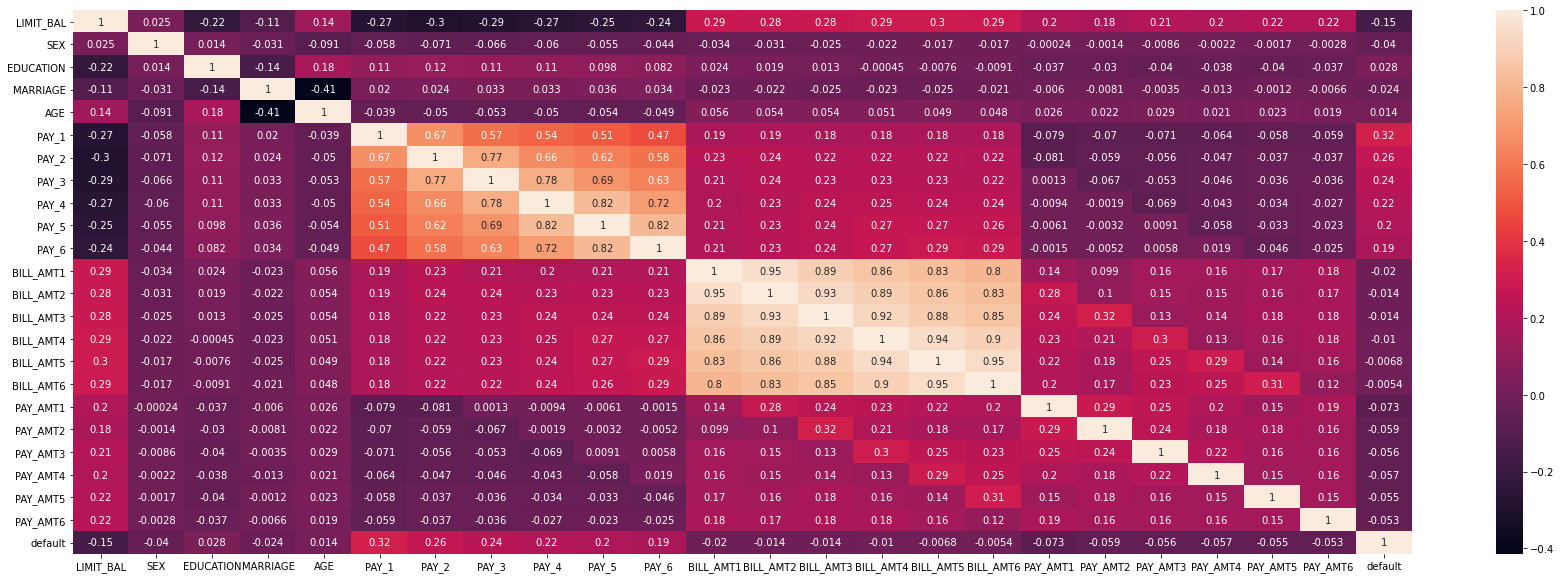

In [10]:
# Checking for correlation in data
plt.figure(figsize=(30,10))
sns.heatmap(data.corr(), annot=True)
# From this , we can infer that linear regression won't do good here as values are not correlated much

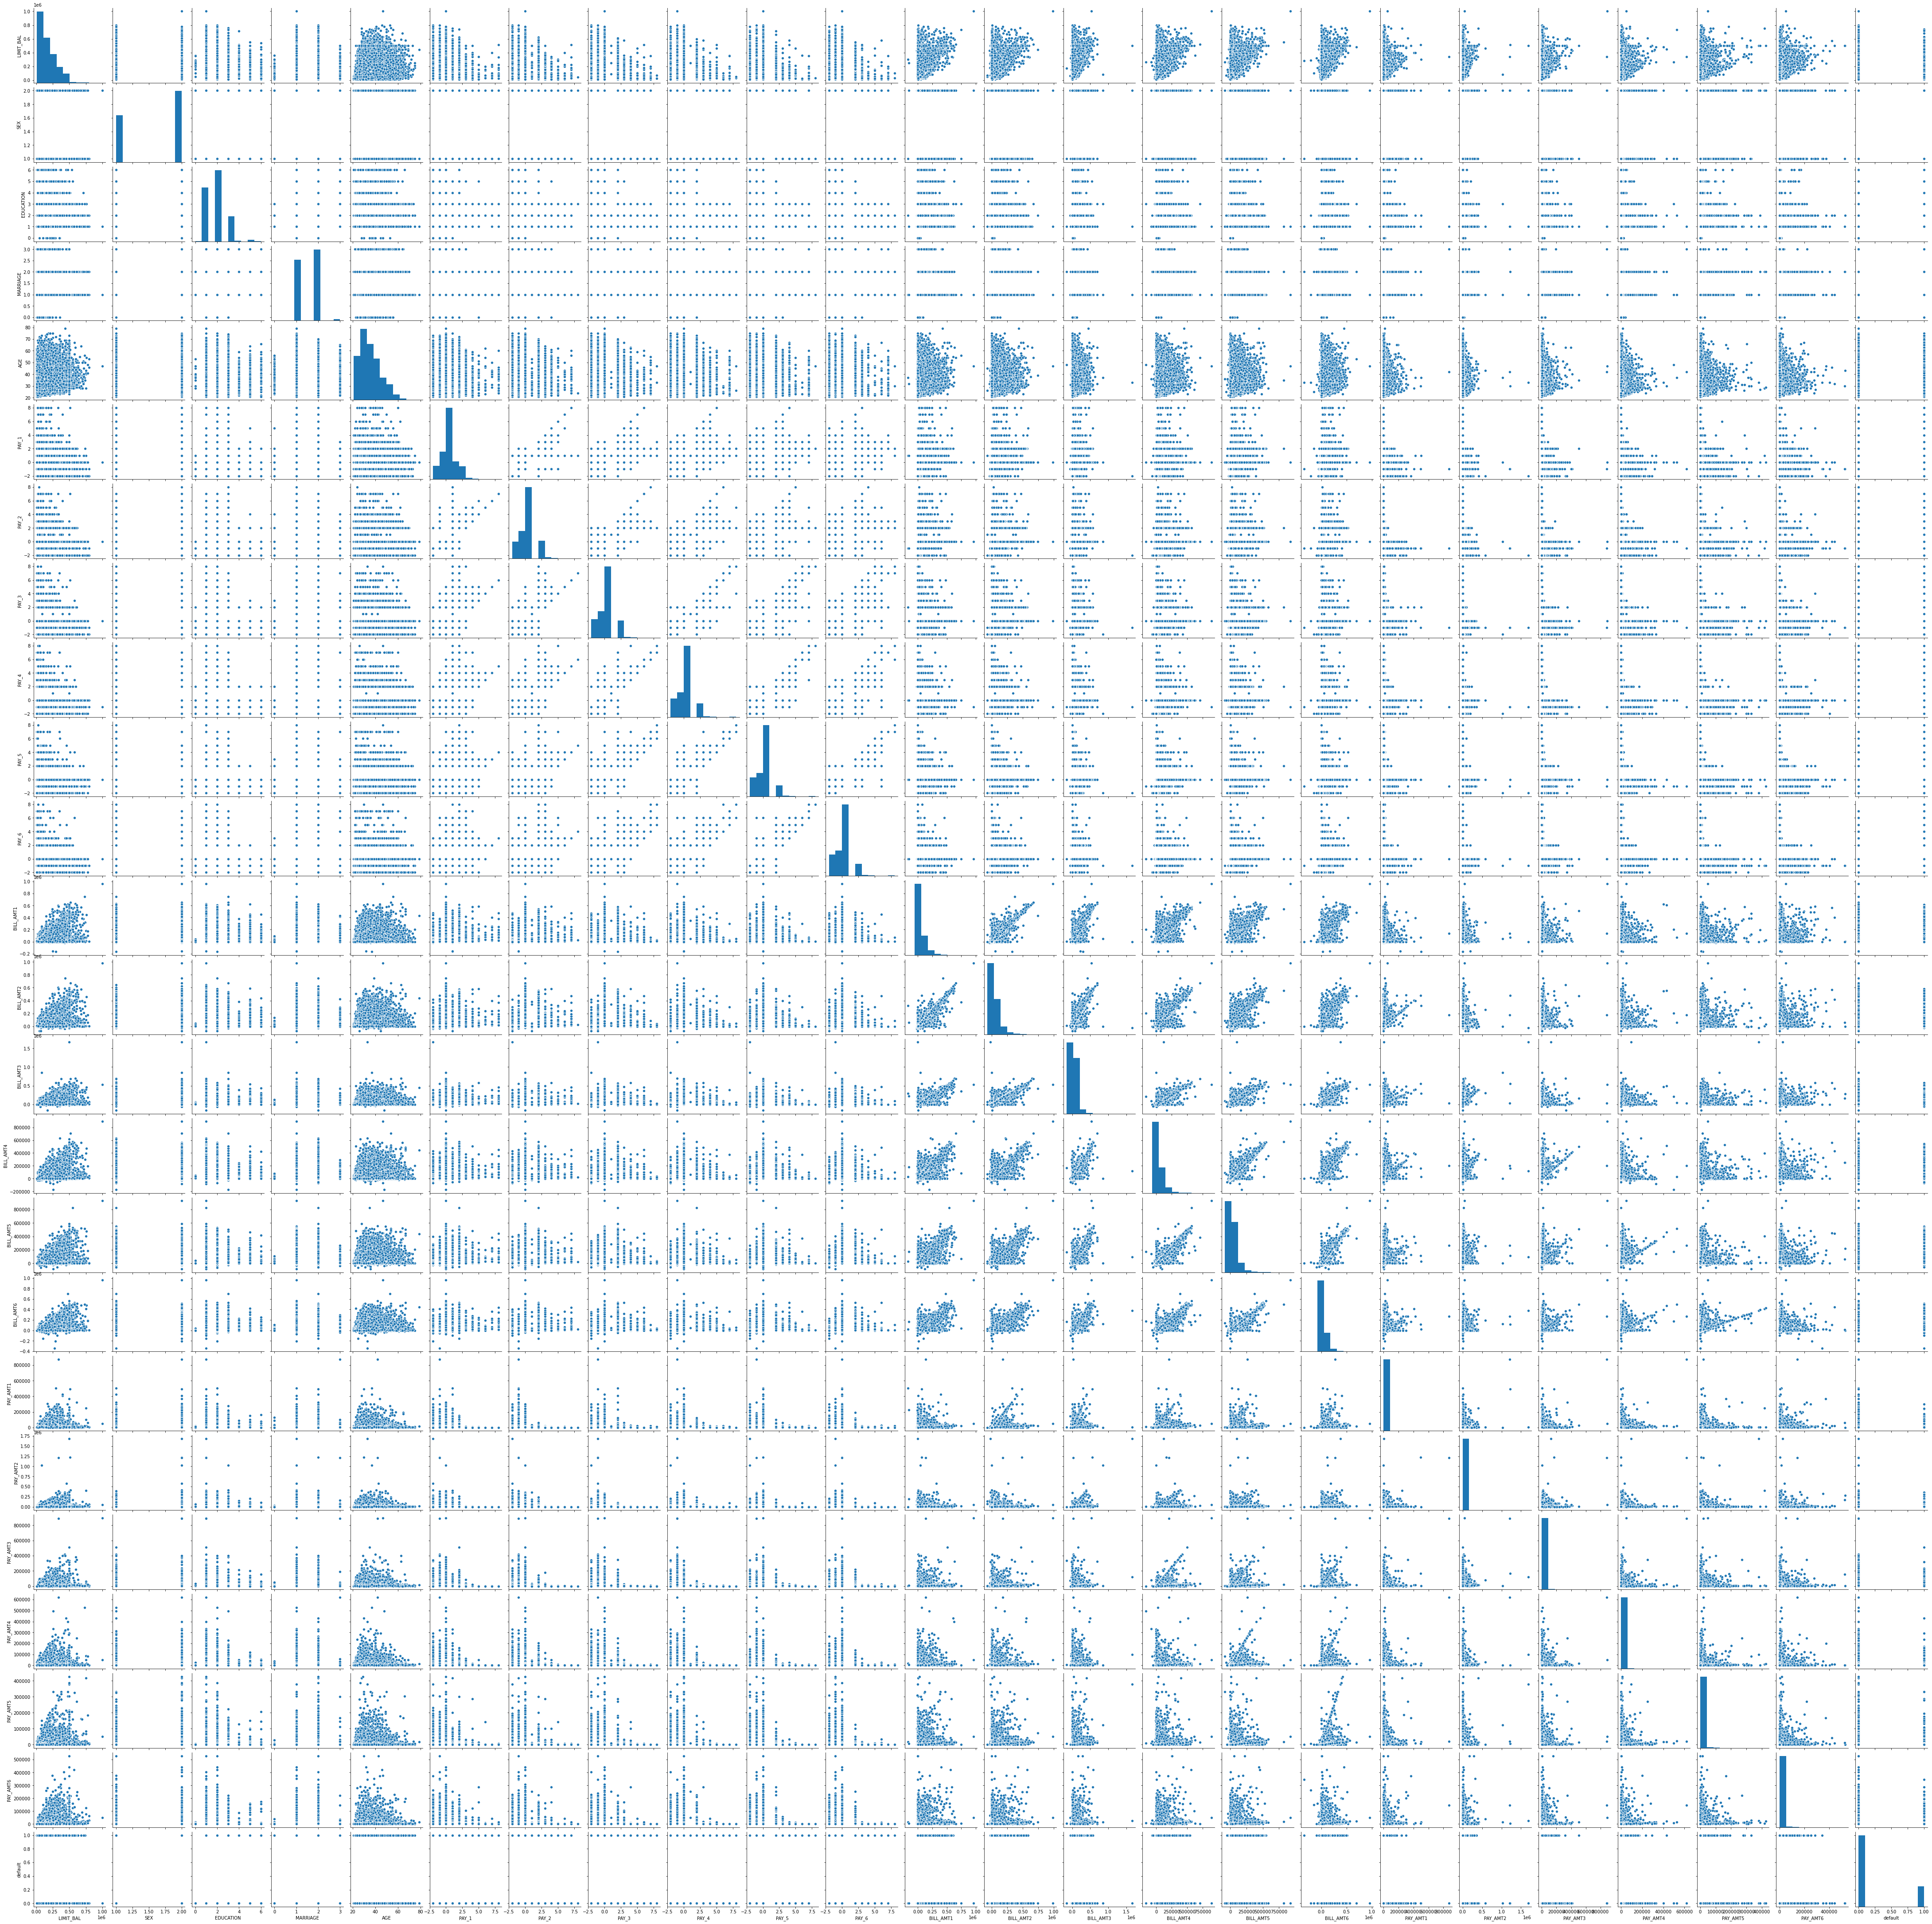

In [5]:
# Pairplot of data to get an idea of relationship among various attributes
sns.pairplot(data)

In [12]:
data.describe(percentiles=[0.01,0.25,0.50,0.75,0.99]).T
# If will see PAY_1 to PAY_6 var, they have min =-2 which should not, it should be -1 acc to meta data and 50% is 0 which is also
# should not happen it could happen because imputation of nan is done already
# for BILL_AMT , min value is -ve, it should not
# So, we have to do something to bring data in cleaner and appropriate format
# SO, WILL CONVERT ALL -VE AND '0' VALUES TO 0-- CAN SEE LATER IN BELOW CELL

count           mean            std       min        1%  \
LIMIT_BAL  30000.0  167484.322667  129747.661567   10000.0  10000.00   
SEX        30000.0       1.603733       0.489129       1.0      1.00   
EDUCATION  30000.0       1.853133       0.790349       0.0      1.00   
MARRIAGE   30000.0       1.551867       0.521970       0.0      1.00   
AGE        30000.0      35.485500       9.217904      21.0     22.00   
PAY_1      30000.0      -0.016700       1.123802      -2.0     -2.00   
PAY_2      30000.0      -0.133767       1.197186      -2.0     -2.00   
PAY_3      30000.0      -0.166200       1.196868      -2.0     -2.00   
PAY_4      30000.0      -0.220667       1.169139      -2.0     -2.00   
PAY_5      30000.0      -0.266200       1.133187      -2.0     -2.00   
PAY_6      30000.0      -0.291100       1.149988      -2.0     -2.00   
BILL_AMT1  30000.0   51223.330900   73635.860576 -165580.0    -81.00   
BILL_AMT2  30000.0   49179.075167   71173.768783  -69777.0   -200.00   
BILL_AMT3  30000.0   47013.154800   69349.387427 -157264.0   -200.00   
BILL_AMT4  30000.0   43262.948967   64332.856134 -170000.0   -212.02   
BILL_AMT5  30000.0   40311.400967   60797.155770  -81334.0   -232.01   
BILL_AMT6  30000.0   38871.760400   59554.107537 -339603.0   -331.03   
PAY_AMT1   30000.0    5663.580500   16563.280354       0.0      0.00   
PAY_AMT2   30000.0    5921.163500   23040.870402       0.0      0.00   
PAY_AMT3   30000.0    5225.681500   17606.961470       0.0      0.00   
PAY_AMT4   30000.0    4826.076867   15666.159744       0.0      0.00   
PAY_AMT5   30000.0    4799.387633   15278.305679       0.0      0.00   
PAY_AMT6   30000.0    5215.502567   17777.465775       0.0      0.00   
default    30000.0       0.221200       0.415062       0.0      0.00   

                25%       50%        75%        99%        max  
LIMIT_BAL  50000.00  140000.0  240000.00  500000.00  1000000.0  
SEX            1.00       2.0       2.00       2.00        2.0  
EDUCATION      1.00       2.0       2.00       5.00        6.0  
MARRIAGE       1.00       2.0       2.00       3.00        3.0  
AGE           28.00      34.0      41.00      60.00       79.0  
PAY_1         -1.00       0.0       0.00       3.00        8.0  
PAY_2         -1.00       0.0       0.00       3.00        8.0  
PAY_3         -1.00       0.0       0.00       3.00        8.0  
PAY_4         -1.00       0.0       0.00       3.00        8.0  
PAY_5         -1.00       0.0       0.00       3.00        8.0  
PAY_6         -1.00       0.0       0.00       3.00        8.0  
BILL_AMT1   3558.75   22381.5   67091.00  350110.68   964511.0  
BILL_AMT2   2984.75   21200.0   64006.25  337495.28   983931.0  
BILL_AMT3   2666.25   20088.5   60164.75  325030.39  1664089.0  
BILL_AMT4   2326.75   19052.0   54506.00  304997.27   891586.0  
BILL_AMT5   1763.00   18104.5   50190.50  285868.33   927171.0  
BILL_AMT6   1256.00   17071.0   49198.25  279505.06   961664.0  
PAY_AMT1    1000.00    2100.0    5006.00   66522.18   873552.0  
PAY_AMT2     833.00    2009.0    5000.00   76651.02  1684259.0  
PAY_AMT3     390.00    1800.0    4505.00   70000.00   896040.0  
PAY_AMT4     296.00    1500.0    4013.25   67054.44   621000.0  
PAY_AMT5     252.50    1500.0    4031.50   65607.56   426529.0  
PAY_AMT6     117.75    1500.0    4000.00   82619.05   528666.0  
default        0.00       0.0       0.00       1.00        1.0

In [20]:
# Outliers detection function to detect outlier rows on the basis of 1.5 IQR 
# This will check how many values are coming as outliers in all rows, this code will show rows which are having outlier
# atleast in 1 col

from collections import Counter

def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        #1st quartile
        Q1 = np.percentile(df[c],25)
        #3rd quartile
        Q3 = np.percentile(df[c],75)
        #IQR
        IQR = Q3-Q1
        #Outlier Step
        outlier_step= IQR * 1.5
        #Detect outlier and their indices
        outlier_list_col = df[(df[c]<Q1 - outlier_step) | (df[c]> Q3 + outlier_step)].index
        #store indices
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i,v in outlier_indices.items() if v > 0) # v>0 shows atleast 1 col has outlier
    
    return multiple_outliers

In [21]:
data.loc[detect_outliers(data,['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'])]

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
6       500000.0    1          1         2   29      0      0      0      0   
17      320000.0    1          1         1   49      0      0      0     -1   
36      280000.0    1          2         1   40      0      0      0      0   
40      360000.0    1          1         2   33      0      0      0      0   
57      180000.0    2          2         1   34      0      0      0      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29491   320000.0    1          1         2   31      1     -2     -2     -2   
29494   320000.0    1          1         2   34      0      0      0      0   
29739   450000.0    1          2         1   43      0      0      0      0   
29903   260000.0    1          1         1   30     -1      0     -1     -1   
29972   190000.0    1          1         1   37      0      0      0      0   

       PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
6          0      0   367965.0   412023.0   445007.0   542653.0   483003.0   
17        -1     -1   253286.0   246536.0   194663.0    70074.0     5856.0   
36         0      0   186503.0   181328.0   180422.0   170410.0   173901.0   
40         0      0   218668.0   221296.0   206895.0   628699.0   195969.0   
57         0      0   175886.0   173440.0   172308.0   168608.0   132202.0   
...      ...    ...        ...        ...        ...        ...        ...   
29491     -2     -2    -6029.0    -9119.0   -46127.0   -50616.0   -53007.0   
29494      0      0    71944.0    88243.0    96574.0   104795.0   113156.0   
29739      0      0   104485.0    92993.0    80647.0    67875.0    58328.0   
29903     -1     -1    27378.0    17082.0    13333.0       99.0       99.0   
29972      0     -1    21628.0    20893.0     5869.0    29223.0    19616.0   

       BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
6       473944.0   55000.0   40000.0   38000.0   20239.0   13750.0   13770.0   
17      195599.0   10358.0   10000.0   75940.0   20000.0  195599.0   50000.0   
36      177413.0    8026.0    8060.0    6300.0    6400.0    6400.0    6737.0   
40      179224.0   10000.0    7000.0    6000.0  188840.0   28000.0    4000.0   
57      129918.0    8083.0    7296.0    5253.0    4814.0    4816.0    3800.0   
...          ...       ...       ...       ...       ...       ...       ...   
29491   -94625.0     185.0      28.0      12.0     208.0       8.0      14.0   
29494   121465.0   19246.0   11550.0   11688.0   12122.0   12156.0    2437.0   
29739   252696.0    6000.0    4000.0    4000.0    7000.0  215000.0    3000.0   
29903   172104.0   10018.0   13333.0      99.0      99.0  172104.0   30013.0   
29972   148482.0    2000.0    3869.0   25128.0   10115.0  148482.0    4800.0   

       default  
6            0  
17           0  
36           0  
40           0  
57           0  
...        ...  
29491        1  
29494        0  
29739        0  
29903        0  
29972        0  

[3767 rows x 24 columns]

above cell execution shows that in these 6 colms, 3767 rows having outliers, means 3767 out of30,000 ~ 12% outliers- significant value so can't remove outlier, can't do cap-floor, 1 more reason of not doing it- this is banking domain ,and there is LIMIT_BAL= 99% - 500000.00 max- 1000000.0 which is a high difference, there could be a premium customer whose limit_bal is as large as this which can play a significant role so removing this could result in loss of info.

##### Univariate Analysis

In [25]:
# numerical values frequency distribution

def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(data[variable], bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

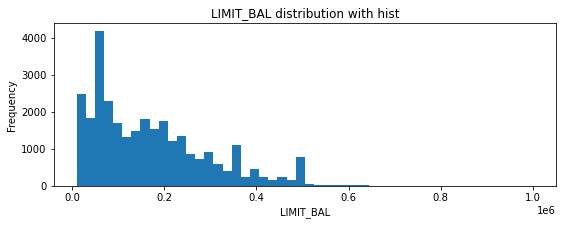

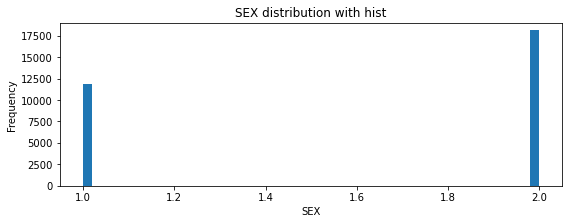

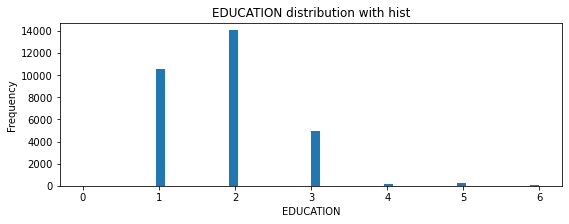

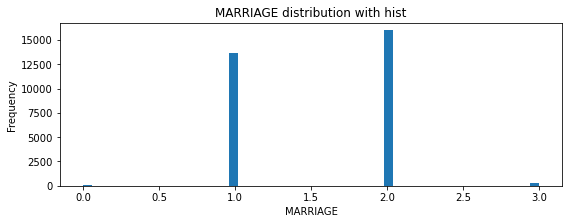

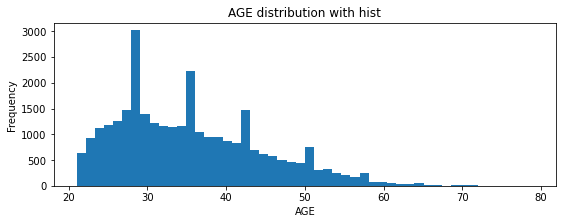

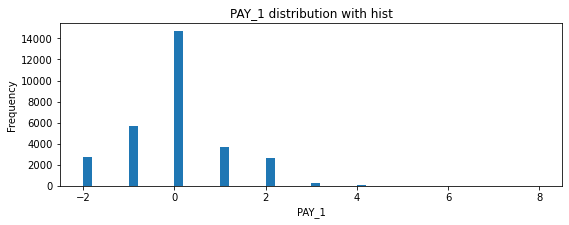

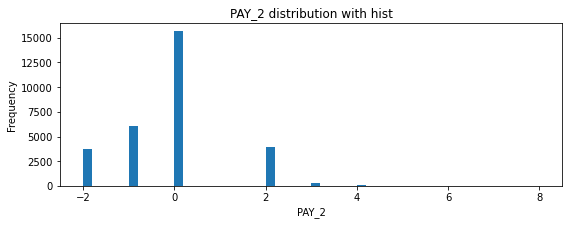

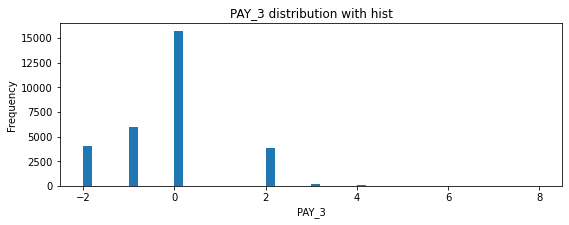

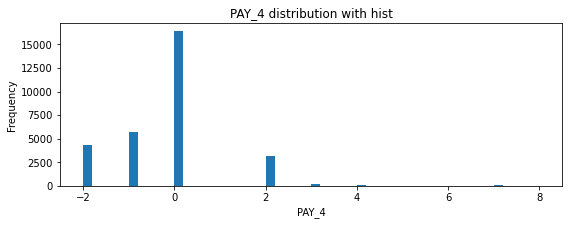

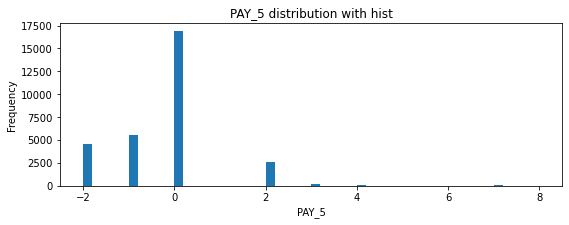

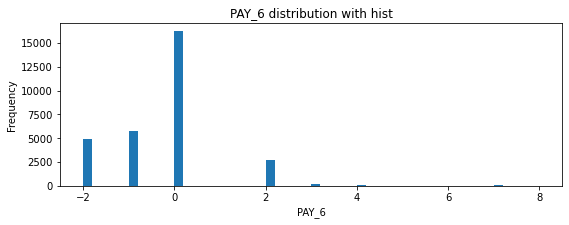

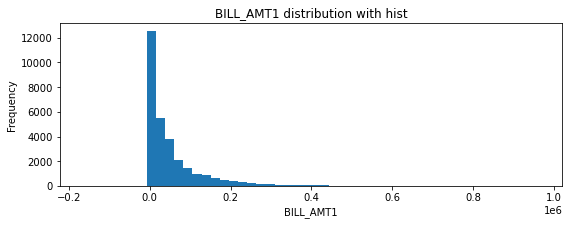

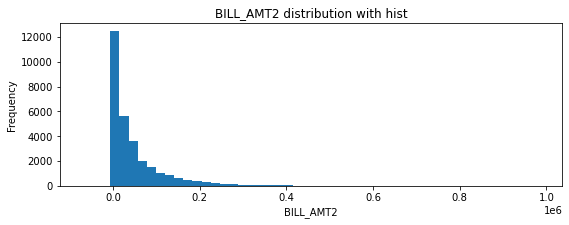

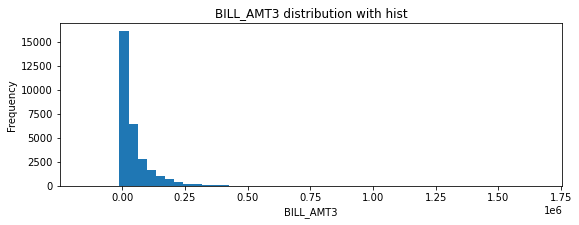

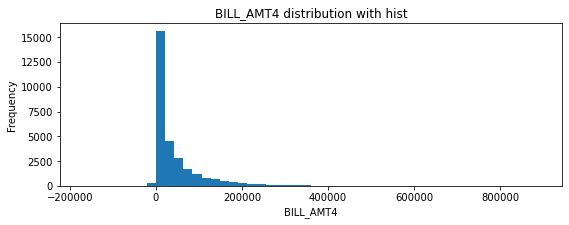

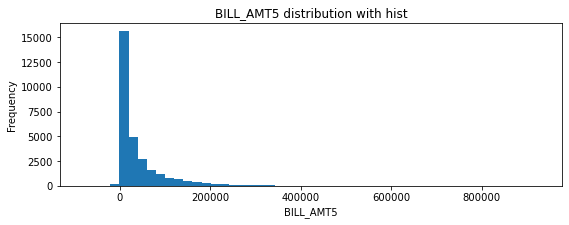

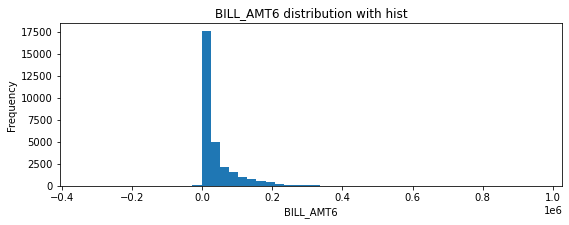

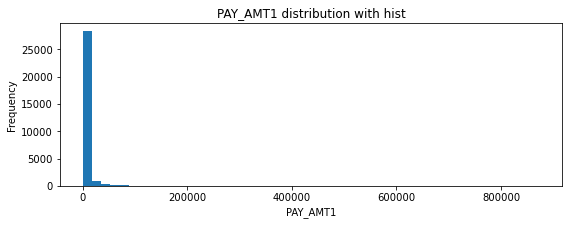

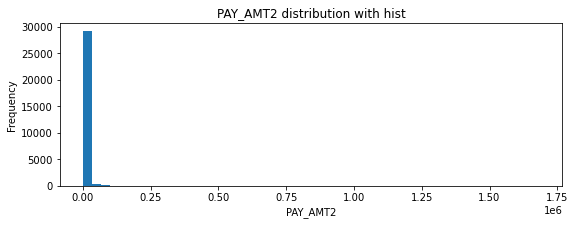

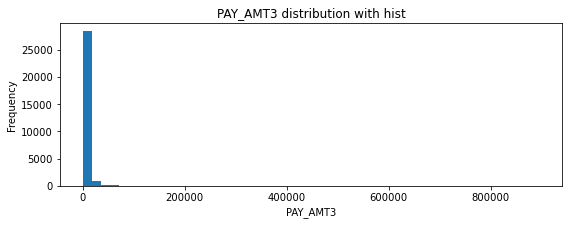

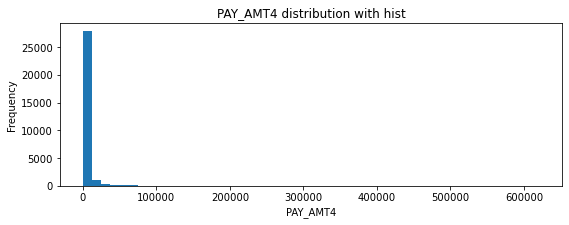

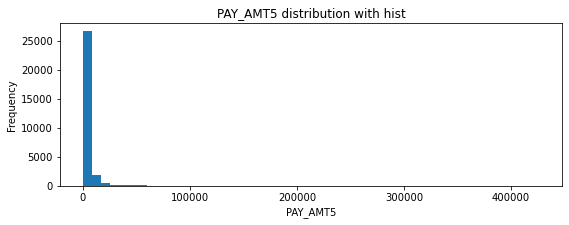

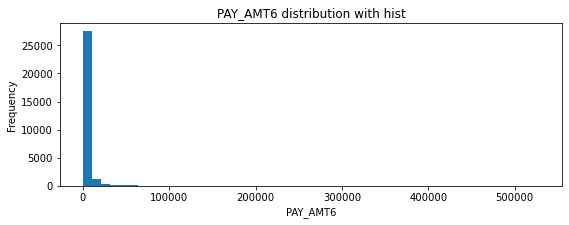

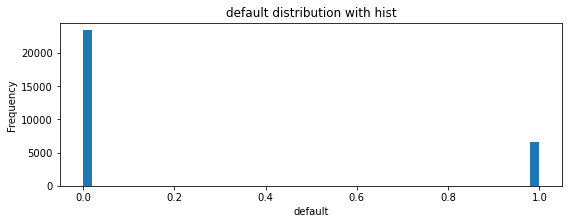

In [27]:
numericVar = data.columns
for n in numericVar:
    plot_hist(n)

##### Checking for unbalance

In [23]:
# Checking for unbalanced of data
data['default'].value_counts()
# This function shows this is highly unbalanced data

0    23364
1     6636
Name: default, dtype: int64

data.duplicated().sum()

##### Data Cleaning

In [6]:
# Replacing '0' and '-2' with '-1', as we can see from metadata that '-1' indicates for 'pay duly' and there is no 
# indication for values '0' and '-2' so we are considering it as '-1' 
data['PAY_1']=data['PAY_1'].replace([0,-2], -1)
data['PAY_2']=data['PAY_2'].replace([0,-2], -1)
data['PAY_3']=data['PAY_3'].replace([0,-2], -1)
data['PAY_4']=data['PAY_4'].replace([0,-2], -1)
data['PAY_5']=data['PAY_5'].replace([0,-2], -1)
data['PAY_6']=data['PAY_6'].replace([0,-2], -1)

In [86]:
# Defining a function to
def corr_2_cols(Col1, Col2):
    res = data.groupby([Col1, Col2]).size().unstack()
    res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res


In [27]:
corr_2_cols('EDUCATION', 'default')

default          0       1      perc
EDUCATION                           
0             14.0     NaN       NaN
1           8549.0  2036.0  0.192348
2          10700.0  3330.0  0.237349
3           3680.0  1237.0  0.251576
4            116.0     7.0  0.056911
5            262.0    18.0  0.064286
6             43.0     8.0  0.156863

In [36]:
# EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [7]:
# Replacing '0', '5' and '6' values in an 'Education' column by '4' to get an enough distribution in column '4'
# As '4', '5' and '6' values has no significance, can see from meta data and '0' is also not useful value so replacing 
# all these with '4'
data['EDUCATION']=data['EDUCATION'].replace([0,5,6], 4)

In [38]:
# Checking values in a column 'EDUCATION' after replacement
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [30]:
corr_2_cols('MARRIAGE', 'default')

default       0     1      perc
MARRIAGE                       
0            49     5  0.092593
1         10453  3206  0.234717
2         12623  3341  0.209283
3           239    84  0.260062

In [8]:
# MARRIAGE: Marital status (1=married, 2=single, 3=others). '0' is of no use so combining it with '3'
data['MARRIAGE']=data['MARRIAGE'].replace([0], 3)

In [40]:
# Checking values in a column 'MARRIAGE' after replacement
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [32]:
corr_2_cols('SEX', 'default')

default      0     1      perc
SEX                           
1         9015  2873  0.241672
2        14349  3763  0.207763

##### Feature Engineering

##### BILL_AMT_AVG_Last6m- Average of Bill Amounts of last 6 months, PAY_AMT_AVG_Last6m- Average of previous payments of last 6 months, Max_Pay_Last6m- Maximum value of previous payments, Max_Bill_Amt_Last6m- Maximum value of Bill Amounts, SEX_MARRIAGE- Combination of SEX and MARRIAGE columns, Credit Utilization Ratio- Maintaining a good credit utilization is important if you want to build and maintain a good creditscore. As your credit utilization increases, your credit score can go down. A high credit utilization indicates that you'reprobably spending a significant portion of your monthly income on debt payments, and this puts you at a higher risk of defaulting on your payments (at least in the eyes of creditors).

In [9]:
data['BILL_AMT_AVG_Last6m']=(data['BILL_AMT1']+data['BILL_AMT2']+data['BILL_AMT3']+data['BILL_AMT4']+data['BILL_AMT5']+data['BILL_AMT6'])/6
data['PAY_AMT_AVG_Last6m']=(data['PAY_AMT1']+data['PAY_AMT2']+data['PAY_AMT3']+data['PAY_AMT4']+data['PAY_AMT5']+data['PAY_AMT6'])/6


data['Max_Pay_Last6m']=data[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].max(axis=1)
data['Max_Bill_Amt_Last6m']=data[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].max(axis=1)

data['SEX_MARRIAGE']= data['SEX']*data['MARRIAGE']
data['Credit Utilization Ratio']= data['BILL_AMT_AVG_Last6m']/data['LIMIT_BAL']

In [87]:
corr_2_cols('SEX_MARRIAGE', 'default')

default           0     1      perc
SEX_MARRIAGE                       
0                49     5  0.092593
1              3844  1346  0.259345
2             11677  3345  0.222673
3                91    40  0.305344
4              7555  1856  0.197216
6               148    44  0.229167

In [10]:
# Checking data after adding features created
data.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1   24      2      2     -1     -1   
1   120000.0    2          2         2   26     -1      2     -1     -1   
2    90000.0    2          2         2   34     -1     -1     -1     -1   
3    50000.0    2          2         1   37     -1     -1     -1     -1   
4    50000.0    1          2         1   57     -1     -1     -1     -1   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -1     -1     3913.0     3102.0      689.0        0.0        0.0   
1     -1      2     2682.0     1725.0     2682.0     3272.0     3455.0   
2     -1     -1    29239.0    14027.0    13559.0    14331.0    14948.0   
3     -1     -1    46990.0    48233.0    49291.0    28314.0    28959.0   
4     -1     -1     8617.0     5670.0    35835.0    20940.0    19146.0   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0        0.0       0.0     689.0       0.0       0.0       0.0       0.0   
1     3261.0       0.0    1000.0    1000.0    1000.0       0.0    2000.0   
2    15549.0    1518.0    1500.0    1000.0    1000.0    1000.0    5000.0   
3    29547.0    2000.0    2019.0    1200.0    1100.0    1069.0    1000.0   
4    19131.0    2000.0   36681.0   10000.0    9000.0     689.0     679.0   

   default  BILL_AMT_AVG_Last6m  PAY_AMT_AVG_Last6m  Max_Pay_Last6m  \
0        1          1284.000000          114.833333           689.0   
1        1          2846.166667          833.333333          2000.0   
2        0         16942.166667         1836.333333          5000.0   
3        0         38555.666667         1398.000000          2019.0   
4        0         18223.166667         9841.500000         36681.0   

   Max_Bill_Amt_Last6m  SEX_MARRIAGE  Credit Utilization Ratio  
0               3913.0             2                  0.064200  
1               3455.0             4                  0.023718  
2              29239.0             4                  0.188246  
3              49291.0             2                  0.771113  
4              35835.0             1                  0.364463

In [12]:
# Checking shape (rows,columns) of data 
data.shape

(30000, 30)

##### Dividing dataset into Dependent and Independent features

In [13]:
X=data.drop(['default'], axis=1)
y=data[['default']]

##### Scaling dataframe by Standard Scaling to get scaled values 

In [14]:
from sklearn.preprocessing import StandardScaler
stdsc=StandardScaler()
X_std=pd.DataFrame(stdsc.fit_transform(X), index=X.index, columns=X.columns)

In [15]:
# Checking scaled dataset
X_std.describe()

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count  3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04   
mean   2.436569e-17 -1.597606e-14  6.817554e-15  7.833586e-15 -7.286024e-17   
std    1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00   
min   -1.213794e+00 -1.234323e+00 -1.131346e+00 -1.068797e+00 -1.571479e+00   
25%   -9.054983e-01 -1.234323e+00 -1.131346e+00 -1.068797e+00 -8.120745e-01   
50%   -2.118326e-01  8.101607e-01  2.118699e-01  8.491306e-01 -1.611565e-01   
75%    5.589071e-01  8.101607e-01  2.118699e-01  8.491306e-01  5.982479e-01   
max    6.416528e+00  8.101607e-01  2.898301e+00  2.767058e+00  4.720729e+00   

              PAY_1         PAY_2         PAY_3         PAY_4         PAY_5  \
count  3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04   
mean   1.329770e-15  2.469639e-15  4.400661e-15 -2.301178e-15  1.462375e-15   
std    1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00   
min   -5.111565e-01 -4.082146e-01 -3.946704e-01 -3.520047e-01 -3.198864e-01   
25%   -5.111565e-01 -4.082146e-01 -3.946704e-01 -3.520047e-01 -3.198864e-01   
50%   -5.111565e-01 -4.082146e-01 -3.946704e-01 -3.520047e-01 -3.198864e-01   
75%   -5.111565e-01 -4.082146e-01 -3.946704e-01 -3.520047e-01 -3.198864e-01   
max    7.365806e+00  7.442625e+00  7.596406e+00  8.078872e+00  8.664752e+00   

              PAY_6     BILL_AMT1     BILL_AMT2     BILL_AMT3     BILL_AMT4  \
count  3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04   
mean   4.966605e-15  3.868410e-17 -4.926489e-16 -6.192313e-16 -7.830112e-16   
std    1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00   
min   -3.274754e-01 -2.944312e+00 -1.671375e+00 -2.945672e+00 -3.315048e+00   
25%   -3.274754e-01 -6.473120e-01 -6.490466e-01 -6.394814e-01 -6.363293e-01   
50%   -3.274754e-01 -3.916884e-01 -3.931159e-01 -3.882529e-01 -3.763451e-01   
75%   -3.274754e-01  2.154919e-01  2.083271e-01  1.896457e-01  1.747667e-01   
max    8.625375e+00  1.240296e+01  1.313360e+01  2.331820e+01  1.318669e+01   

          BILL_AMT5     BILL_AMT6      PAY_AMT1      PAY_AMT2      PAY_AMT3  \
count  3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04   
mean   6.249362e-16 -2.022493e-16 -4.717060e-17 -3.368787e-16 -1.300675e-15   
std    1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00   
min   -2.000874e+00 -6.355247e+00 -3.419416e-01 -2.569895e-01 -2.968013e-01   
25%   -6.340600e-01 -6.316338e-01 -2.815661e-01 -2.208358e-01 -2.746506e-01   
50%   -3.652683e-01 -3.660725e-01 -2.151530e-01 -1.697952e-01 -1.945673e-01   
75%    1.624955e-01  1.733997e-01 -3.970176e-02 -3.998021e-02 -4.093230e-02   
max    1.458743e+01  1.549528e+01  5.239921e+01  7.284299e+01  5.059528e+01   

           PAY_AMT4      PAY_AMT5      PAY_AMT6  BILL_AMT_AVG_Last6m  \
count  3.000000e+04  3.000000e+04  3.000000e+04         3.000000e+04   
mean  -1.950606e-16 -2.968200e-16 -5.318801e-17        -3.651061e-17   
std    1.000017e+00  1.000017e+00  1.000017e+00         1.000017e+00   
min   -3.080626e-01 -3.141361e-01 -2.933821e-01        -1.596912e+00   
25%   -2.891680e-01 -2.976091e-01 -2.867584e-01        -6.354066e-01   
50%   -2.123132e-01 -2.159561e-01 -2.090042e-01        -3.782048e-01   
75%   -5.188511e-02 -5.026084e-02 -6.837436e-02         1.917094e-01   
max    3.933218e+01  2.760363e+01  2.944510e+01         1.315747e+01   

       PAY_AMT_AVG_Last6m  Max_Pay_Last6m  Max_Bill_Amt_Last6m  SEX_MARRIAGE  \
count        3.000000e+04    3.000000e+04         3.000000e+04  3.000000e+04   
mean         1.792029e-16    1.299849e-16         7.263634e-18  2.767342e-15   
std          1.000017e+00    1.000017e+00         1.000017e+00  1.000017e+00   
min         -5.203539e-01   -4.177961e-01        -8.494701e-01 -1.298942e+00   
25%         -4.105378e-01   -3.598517e-01        -6.442625e-01 -4.272664e-01   
50%         -2.838951e-01   -2.85

##### Train Test splitting on dataset

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X_std,y, test_size=0.25,random_state=42)

###### Binning the columns to convert values into bins or groups

In [88]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
X_binned=pd.DataFrame(discrete.fit_transform(X),index=X.index, columns=X.columns).add_suffix('_Rank')

In [89]:
# Binned Dataframe
X_bin_combined=pd.concat([X_binned, y],axis=1,join='inner')
X_bin_combined.head()

LIMIT_BAL_Rank  SEX_Rank  EDUCATION_Rank  MARRIAGE_Rank  AGE_Rank  \
0             0.0       0.0             2.0            1.0       0.0   
1             4.0       0.0             2.0            2.0       1.0   
2             3.0       0.0             2.0            2.0       5.0   
3             2.0       0.0             2.0            1.0       6.0   
4             2.0       0.0             2.0            1.0       9.0   

   PAY_1_Rank  PAY_2_Rank  PAY_3_Rank  PAY_4_Rank  PAY_5_Rank  PAY_6_Rank  \
0         2.0         1.0         0.0         0.0         0.0         0.0   
1         0.0         1.0         0.0         0.0         0.0         1.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   BILL_AMT1_Rank  BILL_AMT2_Rank  BILL_AMT3_Rank  BILL_AMT4_Rank  \
0             2.0             2.0             1.0             1.0   
1             2.0             2.0             2.0             2.0   
2             5.0             4.0             4.0             4.0   
3             6.0             6.0             7.0             5.0   
4             3.0             3.0             6.0             5.0   

   BILL_AMT5_Rank  BILL_AMT6_Rank  PAY_AMT1_Rank  PAY_AMT2_Rank  \
0             1.0             1.0            0.0            1.0   
1             2.0             3.0            0.0            1.0   
2             4.0             4.0            2.0            2.0   
3             6.0             6.0            3.0            4.0   
4             5.0             5.0            3.0            8.0   

   PAY_AMT3_Rank  PAY_AMT4_Rank  PAY_AMT5_Rank  PAY_AMT6_Rank  \
0            0.0            0.0            0.0            0.0   
1            2.0            2.0            0.0            3.0   
2            2.0            2.0            2.0            6.0   
3            2.0            2.0            2.0            2.0   
4            8.0            6.0            1.0            1.0   

   BILL_AMT_AVG_Last6m_Rank  PAY_AMT_AVG_Last6m_Rank  Max_Pay_Last6m_Rank  \
0                       1.0                      0.0                  0.0   
1                       1.0                      1.0                  2.0   
2                       4.0                      4.0                  5.0   
3                       6.0                      3.0                  2.0   
4                       4.0                      8.0                  9.0   

   Max_Bill_Amt_Last6m_Rank  SEX_MARRIAGE_Rank  Credit Utilization Ratio_Rank  \
0                       1.0                2.0                            3.0   
1                       1.0                3.0                            2.0   
2                       4.0                3.0                            4.0   
3                       6.0                2.0                            8.0   
4                       5.0                1.0                            5.0   

   default  
0        1  
1        1  
2        0  
3        0  
4        0

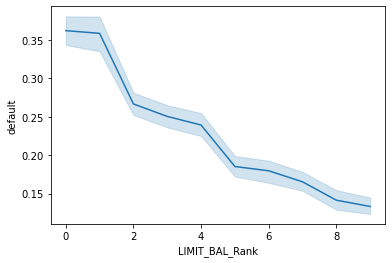

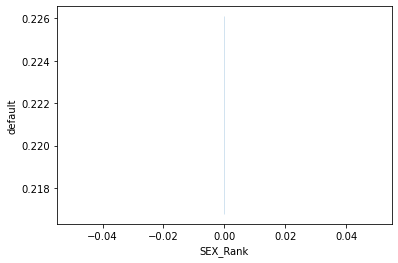

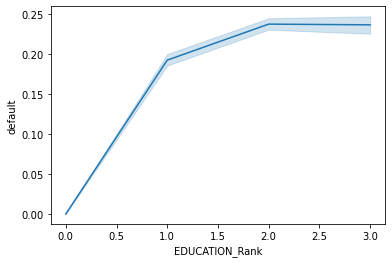

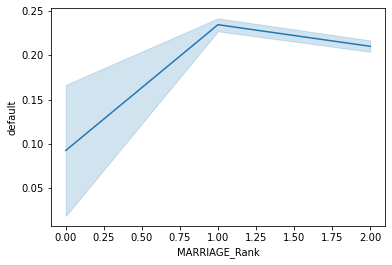

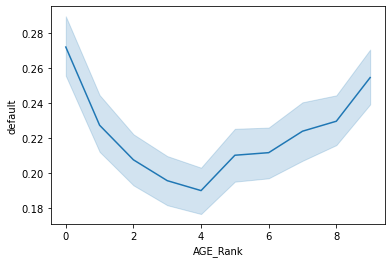

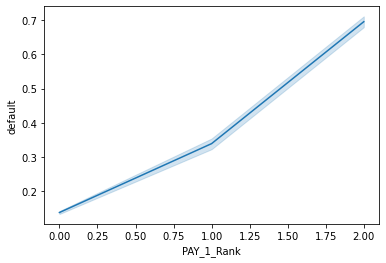

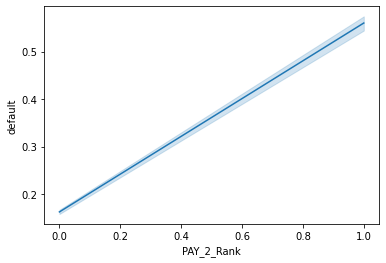

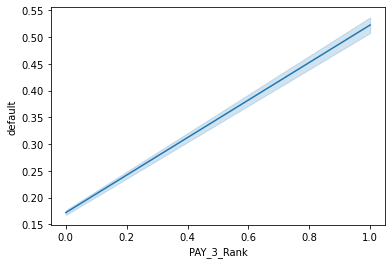

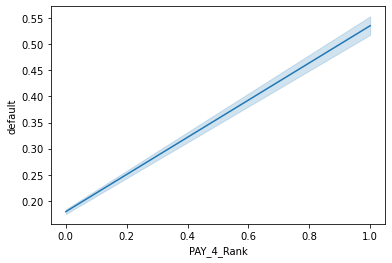

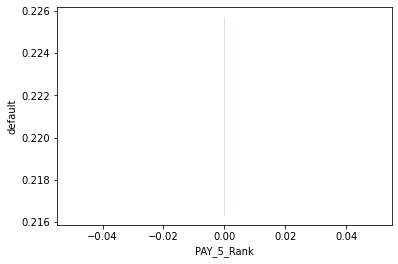

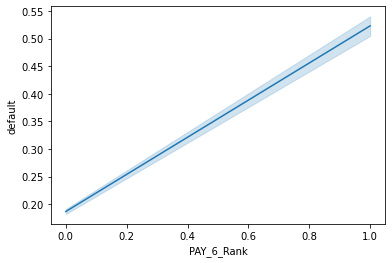

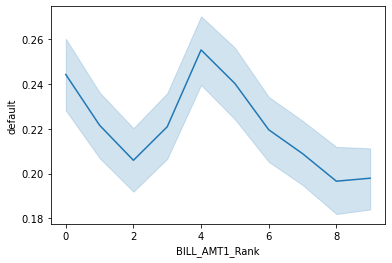

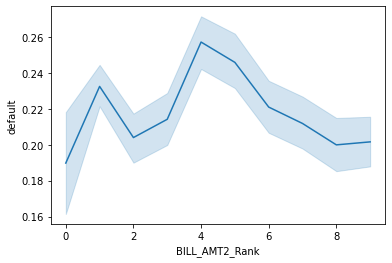

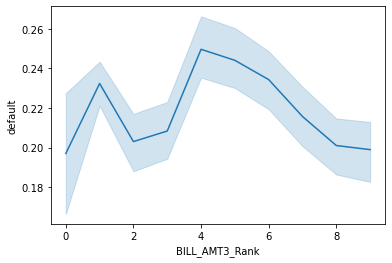

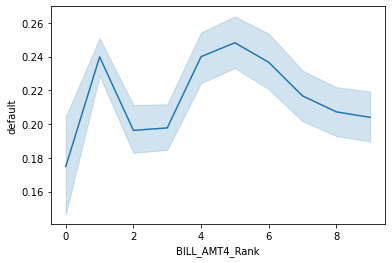

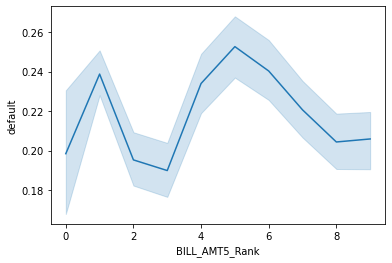

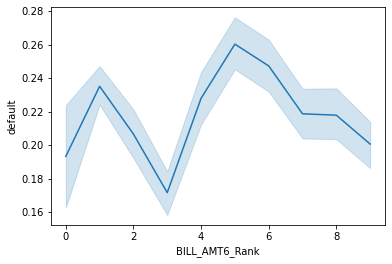

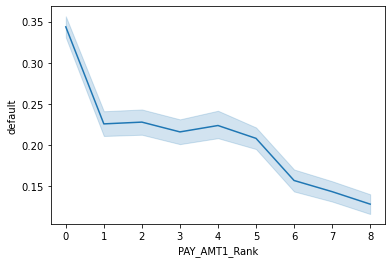

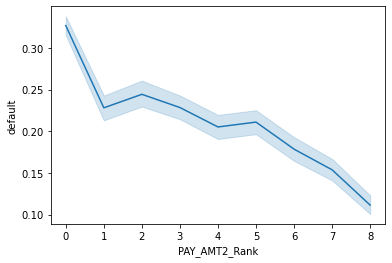

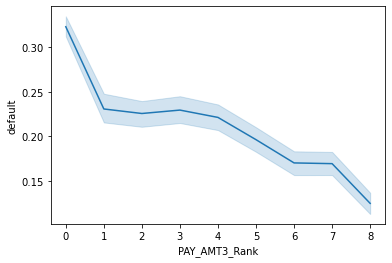

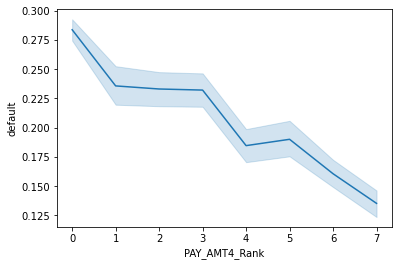

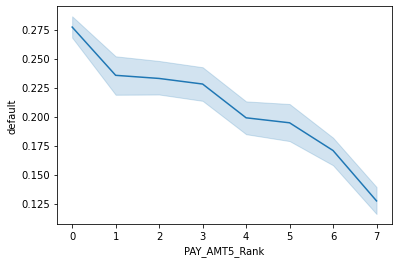

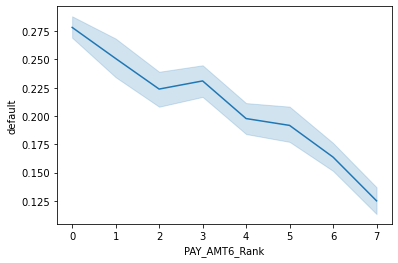

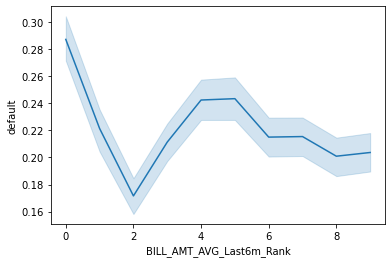

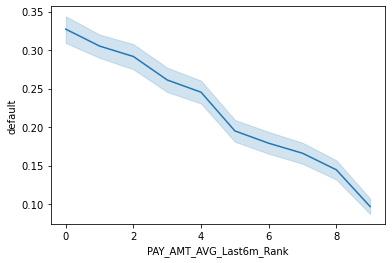

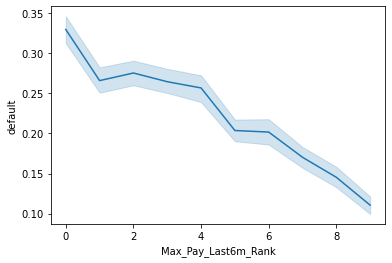

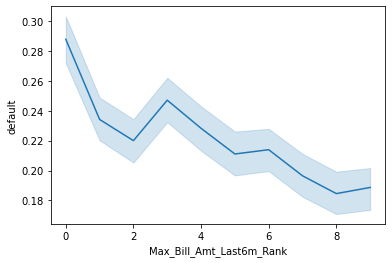

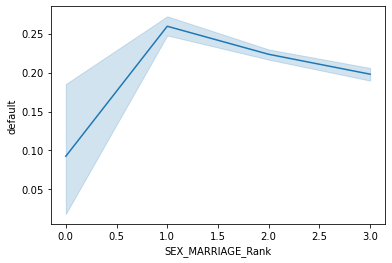

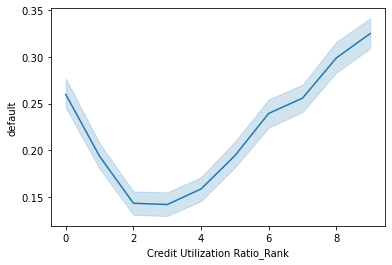

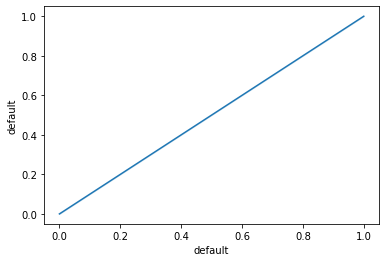

In [90]:
# Using Binned dataframe to represent relationship between independent and dependent/target features visually
import matplotlib.pyplot as plt
from numpy import mean
for col in (X_bin_combined.columns):
    plt.figure()
    sns.lineplot(x=col, y="default",data=X_bin_combined, estimator=mean )
plt.show()

##### Applying Logistic Regression on Unbalanced dataset

In [21]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [22]:
print(logreg.score(X_train,y_train))
logreg.score(X_test,y_test)

0.8159555555555555


0.8125333333333333

In [23]:
y_pred_log=logreg.predict(X_test)

Accuracy: 0.8125333333333333
Precision: 0.6411238825031929
Recall: 0.30854333128457284
f1_score: 0.416597510373444
Average 5-Fold CV Score: 0.0037
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5873
           1       0.67      0.27      0.38      1627

    accuracy                           0.81      7500
   macro avg       0.75      0.62      0.64      7500
weighted avg       0.79      0.81      0.78      7500



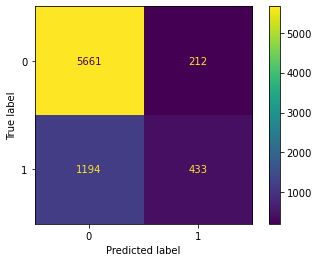

In [59]:
from sklearn import metrics
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_log))
print("Precision:",metrics.precision_score(y_test, y_pred_log))
print("Recall:",metrics.recall_score(y_test, y_pred_log))
print("f1_score:", metrics.f1_score(y_test, y_pred_log))
# Prediction with 10-Fold Cross Validation:
y_pred_cv_log = cross_val_predict(logreg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation

print("Average 5-Fold CV Score: {}".format(round(np.mean(y_pred_cv_log),4)))
print(classification_report(y_test, y_pred))
metrics.plot_confusion_matrix(rf,X_test,y_test)


###### Applying Random Forest Classifier on Unbalanced dataset

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,max_depth=4, random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=0)

In [18]:
feature_importances=pd.DataFrame(rf.feature_importances_,index=X_train.columns, columns=['importance']).sort_values('importance',ascending=False)
feature_importances

importance
PAY_1                       0.313417
PAY_2                       0.173442
PAY_3                       0.134351
PAY_5                       0.074683
PAY_4                       0.068546
PAY_6                       0.063000
PAY_AMT1                    0.030919
PAY_AMT_AVG_Last6m          0.024653
Credit Utilization Ratio    0.013827
PAY_AMT3                    0.012750
PAY_AMT2                    0.011766
Max_Pay_Last6m              0.011457
LIMIT_BAL                   0.011168
Max_Bill_Amt_Last6m         0.010902
BILL_AMT_AVG_Last6m         0.007398
PAY_AMT4                    0.007050
BILL_AMT1                   0.004892
BILL_AMT2                   0.004459
BILL_AMT6                   0.003542
BILL_AMT4                   0.003466
BILL_AMT3                   0.003209
PAY_AMT6                    0.003012
BILL_AMT5                   0.002858
PAY_AMT5                    0.001804
AGE                         0.001311
EDUCATION                   0.001031
SEX_MARRIAGE                0.000492
MARRIAGE                    0.000421
SEX                         0.000174

In [19]:
y_pred=rf.predict(X_test)

Accuracy: 0.8125333333333333
Precision 0.6713178294573643
Recall 0.2661339889366933
f1_score 0.3811619718309859
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5873
           1       0.67      0.27      0.38      1627

    accuracy                           0.81      7500
   macro avg       0.75      0.62      0.64      7500
weighted avg       0.79      0.81      0.78      7500



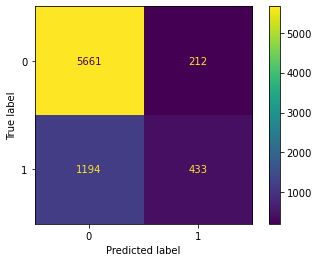

In [31]:
# Evaluation metrics for Random Forest on Unbalanced data
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision",metrics.precision_score(y_test,y_pred))
print("Recall",metrics.recall_score(y_test,y_pred))  
print("f1_score",metrics.f1_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
metrics.plot_confusion_matrix(rf,X_test,y_test)

##### As we know, this data is unbalanced, will try to make it balanced by applying upsampling, downsampling, SMOTE techniques

In [34]:
# will merge X_train and y_train to do upsampling and downsampling, without merging can't do this
# create the training df by remerging X_train and y_train
df_train = X_train.join(y_train)
df_train.sample(5)

LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_1     PAY_2  \
24315  -1.136720 -1.234323   1.555086 -1.068797 -0.378129  1.239280  3.081047   
1061   -0.905498 -1.234323   0.211870 -1.068797  1.466139 -0.511157 -0.408215   
15791  -0.751350  0.810161  -1.131346  0.849131 -1.029047 -0.511157 -0.408215   
294    -0.288907 -1.234323  -1.131346  0.849131 -0.703588  1.239280 -0.408215   
20330   0.481833  0.810161   0.211870 -1.068797  2.008570 -0.511157 -0.408215   

          PAY_3     PAY_4     PAY_5     PAY_6  BILL_AMT1  BILL_AMT2  \
24315  2.269022  2.458288 -0.319886 -0.327475  -0.483812  -0.479455   
1061  -0.394670 -0.352005 -0.319886 -0.327475  -0.549651  -0.567973   
15791 -0.394670 -0.352005 -0.319886 -0.327475  -0.130500  -0.078247   
294   -0.394670 -0.352005 -0.319886 -0.327475  -0.695642  -0.690983   
20330  2.269022  2.458288 -0.319886 -0.327475  -0.693102  -0.644238   

       BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
24315  -0.439840  -0.424517  -0.396759  -0.371009 -0.341942 -0.170186   
1061   -0.552706  -0.579495  -0.593120  -0.568195 -0.250956 -0.122053   
15791  -0.006232   0.067945   0.180827   0.230185 -0.160815 -0.083382   
294    -0.677929  -0.672497  -0.663059  -0.652724 -0.341942 -0.256990   
20330  -0.633227  -0.672497  -0.663059  -0.652724 -0.141072 -0.256990   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  BILL_AMT_AVG_Last6m  \
24315 -0.296801 -0.256996 -0.248683 -0.237130            -0.457842   
1061  -0.171337 -0.180397 -0.150503 -0.124626            -0.596493   
15791 -0.192920 -0.020814 -0.176684 -0.152752             0.035468   
294   -0.296801 -0.308063 -0.314136 -0.209004            -0.710989   
20330 -0.296801 -0.308063 -0.314136 -0.293382            -0.693564   

       PAY_AMT_AVG_Last6m  Max_Pay_Last6m  Max_Bill_Amt_Last6m  SEX_MARRIAGE  \
24315           -0.441441       -0.365071            -0.558590     -1.298942   
1061            -0.284849       -0.335836            -0.635462     -1.298942   
15791           -0.225598       -0.299166            -0.101940      1.316085   
294             -0.495694       -0.378253            -0.772573     -0.427266   
20330           -0.465658       -0.330089            -0.730139     -0.427266   

       Credit Utilization Ratio  default  
24315                  1.215321        1  
1061                  -0.648475        0  
15791                  0.856910        0  
294                   -1.060144        0  
20330                 -1.046524        0

In [37]:
# Counting values in target ['default'] column 
data['default'].value_counts() 
# '0' is in majority, '1' is in minority

0    23364
1     6636
Name: default, dtype: int64

In [44]:
# Shape of a dataset which includes both train and test data
X.shape  

(30000, 29)

In [39]:
# Sampling will be on training data that's why 'df_train' dataframe has less rows
df_train.shape 

(22500, 30)

In [36]:
# Counting number of values in a 'df_train' dataset which are in minority and majority
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df_train[df_train.default==0]
df_minority = df_train[df_train.default==1]

print(df_majority.default.count())
print("-----------")
print(df_minority.default.count())
print("-----------")
print(df_train.default.value_counts())

17491
-----------
5009
-----------
0    17491
1     5009
Name: default, dtype: int64


##### Upsampling technique to make data balanced

In [57]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=17491,    # to match majority class
                                 random_state=587) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
print(len(df_upsampled.default))
df_upsampled.default.value_counts()

34982


1    17491
0    17491
Name: default, dtype: int64

In [60]:
y_upsampled = df_upsampled.default
X_upsampled = df_upsampled.drop(['default'], axis= 1)

##### Downsampling technique to make data balanced

In [58]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=5009,     # to match minority class
                                 random_state=587) # reproducible results
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
# Display new class counts
print(len(df_downsampled.default))
df_downsampled.default.value_counts()

10018


1    5009
0    5009
Name: default, dtype: int64

In [64]:
y_downsampled = df_downsampled.default
X_downsampled = df_downsampled.drop(['default'], axis = 1)

##### SMOTE technique to make data balanced

In [56]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=587)
X_SMOTE, y_SMOTE = sm.fit_sample(X_train, y_train)
print(len(y_SMOTE.default))
print(y_SMOTE.default.sum())
print(y_SMOTE.default.value_counts())

34982
17491
1    17491
0    17491
Name: default, dtype: int64


##### Logistic Regression on Upsampled data

In [93]:
# Fitting logistic Regression model on Upsampled data
from sklearn.linear_model import LogisticRegression
logreg_us=LogisticRegression()
logreg_us.fit(X_upsampled,y_upsampled)

LogisticRegression()

In [96]:
y_pred_log_us=logreg_us.predict(X_test)

Accuracy: 0.7693333333333333
Precision 0.4738445911630269
Recall 0.5734480639213276
f1_score: 0.5189098998887653


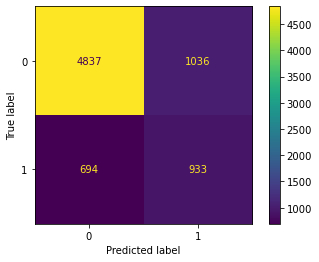

In [97]:
# Evaluating Logistic Regression model on Upsampled data
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_log_us))
print("Precision",metrics.precision_score(y_test,y_pred_log_us))
print("Recall",metrics.recall_score(y_test,y_pred_log_us))
print("f1_score:", metrics.f1_score(y_test, y_pred_log_us))
metrics.plot_confusion_matrix(logreg_us,X_test,y_test)

##### Logistic Regression on Downsampled data

In [99]:
# Fitting logistic Regression model on Downsampled data
from sklearn.linear_model import LogisticRegression
logreg_ds=LogisticRegression()
logreg_ds.fit(X_downsampled,y_downsampled)

LogisticRegression()

In [100]:
y_pred_log_ds=logreg_ds.predict(X_test)

Accuracy: 0.7697333333333334
Precision 0.4749498997995992
Recall 0.5826674861708666
f1_score: 0.523323212807066


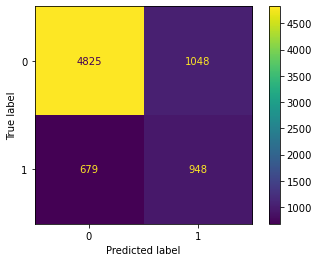

In [101]:
# Evaluating Logistic Regression model on Downsampled data
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_log_ds))
print("Precision",metrics.precision_score(y_test,y_pred_log_ds))
print("Recall",metrics.recall_score(y_test,y_pred_log_ds))
print("f1_score:", metrics.f1_score(y_test, y_pred_log_ds))
metrics.plot_confusion_matrix(logreg_ds,X_test,y_test)

##### Logistic Regression on SMOTE data

In [102]:
# Fitting logistic Regression model on SMOTE data
from sklearn.linear_model import LogisticRegression
logreg_smote=LogisticRegression()
logreg_smote.fit(X_SMOTE,y_SMOTE)

LogisticRegression()

In [103]:
y_pred_log_smote=logreg_smote.predict(X_test)

Accuracy: 0.77
Precision 0.4750254841997961
Recall 0.5728334357713584
f1_score: 0.5193647255502926


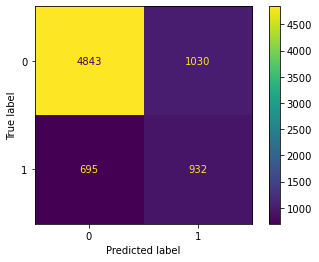

In [104]:
# Evaluating Logistic Regression model on SMOTE data
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_log_smote))
print("Precision",metrics.precision_score(y_test,y_pred_log_smote))
print("Recall",metrics.recall_score(y_test,y_pred_log_smote))
print("f1_score:", metrics.f1_score(y_test, y_pred_log_smote))
metrics.plot_confusion_matrix(logreg_smote,X_test,y_test)

##### Decision Tree on Upsampled data

In [61]:
# Fitting Decision Tree Classification model on Upsampled data
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(random_state=0,max_depth=5)
clf.fit(X_upsampled,y_upsampled)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [62]:
y_pred_dt=clf.predict(X_test)

Accuracy: 0.7693333333333333
Precision 0.47307893361212755
Recall 0.5562384757221881
f1_score: 0.5112994350282486


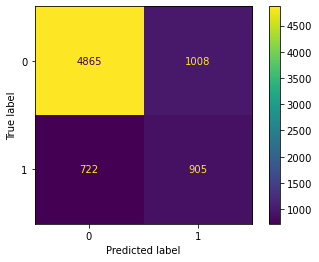

In [63]:
# Evaluating Decision Tree Classification model on Upsampled data
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))
print("Precision",metrics.precision_score(y_test,y_pred_dt))
print("Recall",metrics.recall_score(y_test,y_pred_dt))
print("f1_score:", metrics.f1_score(y_test, y_pred_dt))
metrics.plot_confusion_matrix(clf,X_test,y_test)

##### Decision Tree on Upsampled data

In [67]:
# DT on Downsampled data
from sklearn.tree import DecisionTreeClassifier
clfds=DecisionTreeClassifier(random_state=0,max_depth=5)
clfds.fit(X_downsampled,y_downsampled)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [68]:
y_pred_dt_ds=clfds.predict(X_test)

Accuracy: 0.7724
Precision 0.4791883454734651
Recall 0.5660725261216963
f1_score: 0.5190194420963651


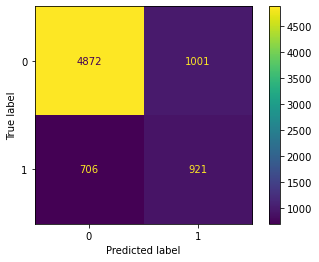

In [69]:
# Evaluating Decision Tree Classification model on Downsampled data
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt_ds))
print("Precision",metrics.precision_score(y_test,y_pred_dt_ds))
print("Recall",metrics.recall_score(y_test,y_pred_dt_ds))
print("f1_score:", metrics.f1_score(y_test, y_pred_dt_ds))
metrics.plot_confusion_matrix(clfds,X_test,y_test)

##### Decision Tree on SMOTE training data

In [70]:
# DT on SMOTE training data
from sklearn.tree import DecisionTreeClassifier
clf_smote=DecisionTreeClassifier(random_state=0,max_depth=5)
clf_smote.fit(X_SMOTE,y_SMOTE)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [71]:
y_pred_dt_smote=clf_smote.predict(X_test)

Accuracy: 0.7478666666666667
Precision 0.4388322520852641
Recall 0.5820528580208973
f1_score: 0.5003963011889037


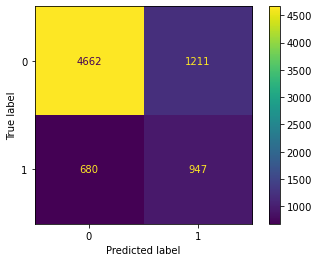

In [72]:
# Evaluating Decision Tree Classification model on SMOTE training data
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt_smote))
print("Precision",metrics.precision_score(y_test,y_pred_dt_smote))
print("Recall",metrics.recall_score(y_test,y_pred_dt_smote))
print("f1_score:", metrics.f1_score(y_test, y_pred_dt_smote))
metrics.plot_confusion_matrix(clf_smote,X_test,y_test)

##### Random Forest on Upsampled data

In [73]:
# RF on Upsampled data
from sklearn.ensemble import RandomForestClassifier
rf_us=RandomForestClassifier(n_estimators=200,max_depth=4, random_state=0)
rf_us.fit(X_upsampled,y_upsampled)

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=0)

In [76]:
# Evaluating Feature importances generated by RF
feature_importances=pd.DataFrame(rf_us.feature_importances_,index=X_upsampled.columns, columns=['importance']).sort_values('importance',ascending=False)
feature_importances

importance
PAY_1                       0.292212
PAY_2                       0.155586
PAY_3                       0.132027
PAY_5                       0.067470
PAY_4                       0.064735
PAY_6                       0.050809
PAY_AMT_AVG_Last6m          0.038234
PAY_AMT1                    0.030949
Credit Utilization Ratio    0.026325
LIMIT_BAL                   0.021512
Max_Pay_Last6m              0.015202
PAY_AMT3                    0.015104
Max_Bill_Amt_Last6m         0.015032
PAY_AMT2                    0.014416
BILL_AMT_AVG_Last6m         0.011005
PAY_AMT4                    0.008972
BILL_AMT1                   0.008824
PAY_AMT6                    0.006974
BILL_AMT2                   0.006905
BILL_AMT3                   0.005184
BILL_AMT5                   0.003617
PAY_AMT5                    0.002863
BILL_AMT6                   0.002713
BILL_AMT4                   0.002301
EDUCATION                   0.000415
AGE                         0.000380
SEX_MARRIAGE                0.000116
MARRIAGE                    0.000098
SEX                         0.000018

##### Random Forest on Downsampled data

In [78]:
# RF on downsampled data
from sklearn.ensemble import RandomForestClassifier
rf_ds=RandomForestClassifier(n_estimators=200,max_depth=4, random_state=0)
rf_ds.fit(X_downsampled,y_downsampled)

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=0)

In [79]:
# Evaluating Feature importances generated by RF
feature_importances=pd.DataFrame(rf_ds.feature_importances_,index=X_downsampled.columns, columns=['importance']).sort_values('importance',ascending=False)
feature_importances

importance
PAY_1                       0.289424
PAY_2                       0.149946
PAY_3                       0.132197
PAY_5                       0.067988
PAY_4                       0.060123
PAY_6                       0.044675
PAY_AMT_AVG_Last6m          0.039955
PAY_AMT1                    0.032863
PAY_AMT2                    0.022731
Credit Utilization Ratio    0.021259
LIMIT_BAL                   0.020757
Max_Bill_Amt_Last6m         0.016141
Max_Pay_Last6m              0.015868
PAY_AMT4                    0.014957
PAY_AMT3                    0.014285
BILL_AMT_AVG_Last6m         0.009980
BILL_AMT1                   0.009826
PAY_AMT6                    0.008170
BILL_AMT2                   0.006364
BILL_AMT3                   0.004747
BILL_AMT5                   0.004405
BILL_AMT4                   0.003108
BILL_AMT6                   0.003039
PAY_AMT5                    0.002485
AGE                         0.001805
EDUCATION                   0.001405
SEX_MARRIAGE                0.000768
MARRIAGE                    0.000612
SEX                         0.000115

##### Random Forest on SMOTE training data

In [80]:
# RF on SMOTE data
from sklearn.ensemble import RandomForestClassifier
rf_smote=RandomForestClassifier(n_estimators=200,max_depth=4, random_state=0)
rf_smote.fit(X_SMOTE,y_SMOTE)

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=0)

In [81]:
# Evaluating Feature importances generated by RF
feature_importances=pd.DataFrame(rf_smote.feature_importances_,index=X_SMOTE.columns, columns=['importance']).sort_values('importance',ascending=False)
feature_importances

importance
PAY_1                       0.315108
PAY_2                       0.147181
PAY_3                       0.125860
PAY_4                       0.060759
PAY_5                       0.058544
PAY_6                       0.052689
PAY_AMT_AVG_Last6m          0.043408
PAY_AMT1                    0.027514
LIMIT_BAL                   0.022599
Max_Pay_Last6m              0.021049
Credit Utilization Ratio    0.018706
PAY_AMT3                    0.015006
PAY_AMT2                    0.014762
Max_Bill_Amt_Last6m         0.012362
PAY_AMT6                    0.011261
PAY_AMT4                    0.011163
EDUCATION                   0.006848
PAY_AMT5                    0.006195
BILL_AMT_AVG_Last6m         0.005989
BILL_AMT1                   0.005444
BILL_AMT3                   0.003898
BILL_AMT2                   0.003569
BILL_AMT4                   0.003142
BILL_AMT6                   0.002761
BILL_AMT5                   0.002469
AGE                         0.000747
SEX_MARRIAGE                0.000695
MARRIAGE                    0.000229
SEX                         0.000043

##### Support Vector Classifier on Upsampled data

In [87]:
# SVC on Upsampled data
from sklearn.svm import SVC
clf_us=SVC(kernel="rbf",random_state=0,probability=True)
clf_us.fit(X_upsampled,y_upsampled)

SVC(probability=True, random_state=0)

In [88]:
y_pred_svm_us=clf_us.predict(X_test)

Accuracy: 0.7609333333333334
Precision 0.46070075757575757
Recall 0.5980331899200984
f1_score: 0.5204600160470715


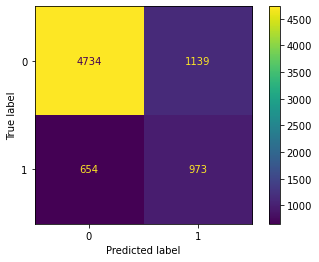

In [89]:
# Evaluating Support Vector Classification model Upsampled data
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm_us))
print("Precision",metrics.precision_score(y_test,y_pred_svm_us))
print("Recall",metrics.recall_score(y_test,y_pred_svm_us))
print("f1_score:", metrics.f1_score(y_test, y_pred_svm_us))
metrics.plot_confusion_matrix(clf_us,X_test,y_test)

##### Support Vector Classifier on Downsampled data

In [84]:
# SVC on downsampled data
from sklearn.svm import SVC
clf_ds=SVC(kernel="rbf",random_state=0,probability=True)
clf_ds.fit(X_downsampled,y_downsampled)

SVC(probability=True, random_state=0)

In [85]:
y_pred_svm_ds=clf_ds.predict(X_test)  

Accuracy: 0.7542666666666666
Precision 0.45143884892086333
Recall 0.6170866625691457
f1_score: 0.521423007011166


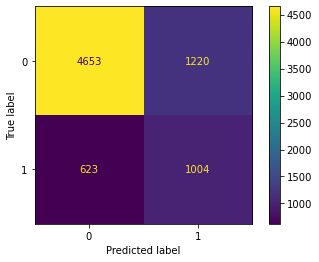

In [86]:
# Evaluating Support Vector Classification model Downsampled data
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm_ds))
print("Precision",metrics.precision_score(y_test,y_pred_svm_ds))
print("Recall",metrics.recall_score(y_test,y_pred_svm_ds))
print("f1_score:", metrics.f1_score(y_test, y_pred_svm_ds))
metrics.plot_confusion_matrix(clf_ds,X_test,y_test)

##### Support Vector Classifier on SMOTE training data

In [90]:
# SVC on SMOTE data
from sklearn.svm import SVC
clf_smote=SVC(kernel="rbf",random_state=0,probability=True)
clf_smote.fit(X_SMOTE,y_SMOTE)

SVC(probability=True, random_state=0)

In [91]:
y_pred_svm_smote=clf_smote.predict(X_test) 

Accuracy: 0.7592
Precision 0.45823611759216054
Recall 0.6035648432698217
f1_score: 0.5209549071618037


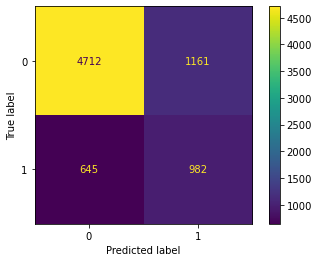

In [92]:
# Evaluating Support Vector Classification model SMOTE data
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm_smote))
print("Precision",metrics.precision_score(y_test,y_pred_svm_smote))
print("Recall",metrics.recall_score(y_test,y_pred_svm_smote))
print("f1_score:", metrics.f1_score(y_test, y_pred_svm_smote))
metrics.plot_confusion_matrix(clf_smote,X_test,y_test)

##### Gradient Boosting on upsampled training set

In [ ]:
# Gradient Boosting on upsampled training set
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'n_estimators': [200,300],
              'learning_rate' : [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_gbc = grid_gbc.fit(X_upsampled, y_upsampled)
print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)
gbc_upsampled = grid_gbc.best_estimator_

CPU times: user 20min 31s, sys: 187 ms, total: 20min 31s
Wall time: 20min 33s
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
0.8342155814878822

In [107]:
# Fitting GradientBoostingClassifier on upsampled training set
from sklearn.ensemble import GradientBoostingClassifier
gbc_upsampled = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='deprecated', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
gbc_upsampled.fit(X_upsampled, y_upsampled)

GradientBoostingClassifier(learning_rate=1.0, n_estimators=300)

In [108]:
y_pred_GBM_us=gbc_upsampled.predict(X_test) 

Accuracy: 0.7316
Precision 0.4069431051108968
Recall 0.5187461585740627
f1_score: 0.4560929478519319


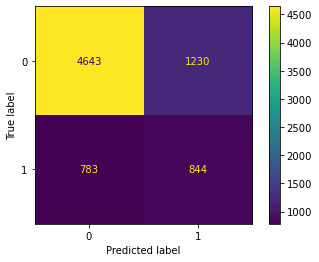

In [109]:
# Evaluating GradientBoosting Classification model on upsampled data
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_GBM_us))
print("Precision",metrics.precision_score(y_test,y_pred_GBM_us))
print("Recall",metrics.recall_score(y_test,y_pred_GBM_us))
print("f1_score:", metrics.f1_score(y_test, y_pred_GBM_us))
metrics.plot_confusion_matrix(gbc_upsampled,X_test,y_test)

##### Gradient Boosting on downsampled training set

In [ ]:
# Gradient Boosting on downsampled training set
param_grid = {'n_estimators': [200,300],
              'learning_rate' : [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_gbc = grid_gbc.fit(X_downsampled, y_downsampled)
print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)
gbc_downsampled = grid_gbc.best_estimator_


CPU times: user 5min 10s, sys: 46 ms, total: 5min 10s
Wall time: 5min 10s
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
0.6789580080439896

In [110]:
# Fitting GradientBoostingClassifier on downsampled training set
gbc_downsampled = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='deprecated', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
gbc_downsampled.fit(X_downsampled, y_downsampled)

GradientBoostingClassifier(learning_rate=0.5, n_estimators=200)

In [111]:
y_pred_GBM_ds=gbc_downsampled.predict(X_test) 

Accuracy: 0.7002666666666667
Precision 0.3872139484199056
Recall 0.6551936078672403
f1_score: 0.4867579908675799


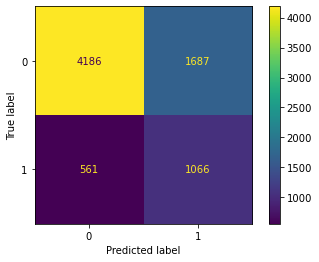

In [112]:
# Evaluating GradientBoosting Classification model on downsampled data
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_GBM_ds))
print("Precision",metrics.precision_score(y_test,y_pred_GBM_ds))
print("Recall",metrics.recall_score(y_test,y_pred_GBM_ds))
print("f1_score:", metrics.f1_score(y_test, y_pred_GBM_ds))
metrics.plot_confusion_matrix(gbc_downsampled,X_test,y_test)

##### Gradient Boosting on SMOTE training set

In [ ]:
# Gradient Boosting on SMOTE training set
param_grid = {'n_estimators': [200,300],
              'learning_rate' : [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_gbc = grid_gbc.fit(X_SMOTE, y_SMOTE)
print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)
gbc_SMOTE = grid_gbc.best_estimator_

CPU times: user 23min 6s, sys: 191 ms, total: 23min 6s
Wall time: 23min 7s
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
0.7991189606292041

In [114]:
# Fitting GradientBoostingClassifier on SMOTE training set
gbc_SMOTE = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='deprecated', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
gbc_SMOTE.fit(X_SMOTE, y_SMOTE)

GradientBoostingClassifier(learning_rate=0.5, n_estimators=200)

In [115]:
y_pred_GBM_smote=gbc_SMOTE.predict(X_test) 

Accuracy: 0.8022666666666667
Precision 0.5614334470989761
Recall 0.4044253226797787
f1_score: 0.47016791711325473


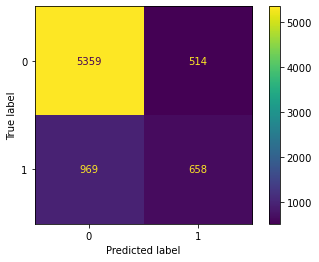

In [116]:
# Evaluating GradientBoosting Classification model on SMOTE data
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_GBM_smote))
print("Precision",metrics.precision_score(y_test,y_pred_GBM_smote))
print("Recall",metrics.recall_score(y_test,y_pred_GBM_smote))
print("f1_score:", metrics.f1_score(y_test, y_pred_GBM_smote))
metrics.plot_confusion_matrix(gbc_SMOTE,X_test,y_test)

##### XGBoost on Upsampled data

In [118]:
# XGBoost on Upsampled data
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=42, n_jobs=-1,max_depth=3)
xgb_model.fit(X_upsampled, y_upsampled)

[19:33:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [119]:
y_pred_XGB_us=xgb_model.predict(X_test) 

Accuracy: 0.7586666666666667
Precision 0.4583143507972665
Recall 0.6183159188690842
f1_score: 0.5264259549973835


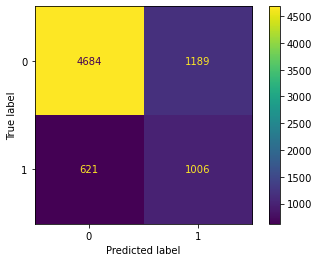

In [120]:
# Evaluating XGBoosting Classification model on Upsampled data
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_XGB_us))
print("Precision",metrics.precision_score(y_test,y_pred_XGB_us))
print("Recall",metrics.recall_score(y_test,y_pred_XGB_us))
print("f1_score:", metrics.f1_score(y_test, y_pred_XGB_us))
metrics.plot_confusion_matrix(xgb_model,X_test,y_test)

##### XGBoost on downsampled data

In [121]:
# XGBoost on downsampled data
from xgboost import XGBClassifier
xgb_model_ds = XGBClassifier(random_state=42, n_jobs=-1,max_depth=3)
xgb_model_ds.fit(X_downsampled, y_downsampled)

[19:36:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [122]:
y_pred_XGB_ds=xgb_model_ds.predict(X_test) 

Accuracy: 0.7269333333333333
Precision 0.41669964384645825
Recall 0.6472034419176398
f1_score: 0.5069812229176697


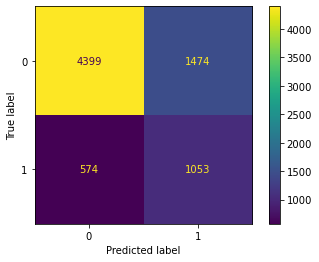

In [123]:
# Evaluating XGBoosting Classification model on Downsampled data
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_XGB_ds))
print("Precision",metrics.precision_score(y_test,y_pred_XGB_ds))
print("Recall",metrics.recall_score(y_test,y_pred_XGB_ds))
print("f1_score:", metrics.f1_score(y_test, y_pred_XGB_ds))
metrics.plot_confusion_matrix(xgb_model_ds,X_test,y_test)

##### XGBoost on SMOTE data

In [124]:
# XGBoost on SMOTE data
from xgboost import XGBClassifier
xgb_model_smote = XGBClassifier(random_state=42, n_jobs=-1,max_depth=3)
xgb_model_smote.fit(X_SMOTE, y_SMOTE)

[19:38:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [125]:
y_pred_XGB_SMOTE=xgb_model_smote.predict(X_test) 

Accuracy: 0.7948
Precision 0.5328358208955224
Recall 0.4388444990780578
f1_score: 0.48129423660262893


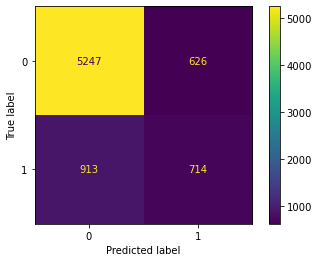

In [126]:
# Evaluating XGBoosting Classification model on SMOTE data
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_XGB_SMOTE))
print("Precision",metrics.precision_score(y_test,y_pred_XGB_SMOTE))
print("Recall",metrics.recall_score(y_test,y_pred_XGB_SMOTE))
print("f1_score:", metrics.f1_score(y_test, y_pred_XGB_SMOTE))
metrics.plot_confusion_matrix(xgb_model_smote,X_test,y_test)

## After applying various algorithms, I concluded that Grdient Boosting Classifier on SMOTE dataset gave maximum accuracy of 80%
## This model is able to make prediction with 80% accuracy
